# 4.4	Strukturelle Analysen der annotieren Korpora
# 5.2	Annotation von Stellenanzeigen als iterativer Prozess


## Analyse von Patterns zu Erstellung eines geeigneten RegEx mit verschiedenen Bedingungen

### Zielsetzung

1. Visuelle Darstellung der Ränder der annotierten Texte zueinander
2. Finden von Patterns zu Erstellung eines regulären Ausdrucks 


## 2. Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

## 3. Funktionen

In [2]:
def tokenize(df, column_inputText, newColumnName):
    """
    Needs the following import:
    import nltk
    from nltk.tokenize import word_tokenize

    Needs a datframe with a text (string) column
    1. creates a new column
    2. tokenizes the text in the new column
    3. return df
    """
    df[column_inputText] = df[column_inputText].astype(str)
    df[newColumnName] = df[column_inputText].apply(word_tokenize)
    return df

def detokenize(df, column_inputText, newColumnName):
    """
    Needs a dataframe with a tokenized text column (column_inputText)
    1. creates a new column
    2. joins Text in List format to string
    3. return df
    """
    
    df[newColumnName] = [' '.join(map(str, l)) for l in df[column_inputText]]
    return df


def get_frequency_of_words_in_column(df, columnname):
    """
    Needs the following import:
    import pandas as pd
    
    1. converts a column to a list in a list (xss)
    2. converts xss to a list containing all tokens of the dataframe column
    3. creates a dataframe from the list
    4. count the frequency of all words and save the number in a new column
    5. returns the dataframe with a set of all words and their frequency
    """
    
    xss = df[columnname].tolist()
    tokenOverview = [x for xs in xss for x in xs]
    df_tokenOverview = pd.DataFrame(tokenOverview, columns =['Wörter'])
    df_tokenOverview = pd.DataFrame(xss, columns =['Wörter'])

    df_tokenOverview['Frequenz'] = df_tokenOverview.groupby('Wörter')['Wörter'].transform('count')
    df_tokenOverview = df_tokenOverview.drop_duplicates()
    df_tokenOverview = df_tokenOverview.sort_values(by=['Frequenz'], ascending=False)
    
    return df_tokenOverview



def plot_top_ngrams_barchart(text, n, plot_headline):
    """
    Needs: 
    text: a string input from a pandas dataframe column 
    n: number to define the word-sequence (as int)
    plot_headline: Define the headline of the bar chart (string)
    Step 1: splits the text and saves everything in a list. 
            Note that all words of the dataframe are put in one list.
    Step 2: uses nltk.utils ngrams() to convert the list to bigrams
    Step 3: convert list to pandas dataframe with all n-grams as strings and their frequencies
    Step 4: saves the top 15 popular bigrams as a new pandas dataframe
    Step 5: visualize the top 15 popular bigrams in bar chart
    The following libaries are needed:
    from nltk.util import ngrams
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    """
    lst_df = text.str.split()
    lst_in_lst = lst_df.values.tolist()
    lst = [word for i in lst_in_lst for word in i]
    
    ngrams_list = list(ngrams(lst, n))
    
    ngrams_dict = {x:ngrams_list.count(x) for x in ngrams_list}
    df_ngrams = pd.DataFrame(list(ngrams_dict.items()), columns=['ngrams', 'Anzahl'])
    df_ngrams["ngrams"] = df_ngrams["ngrams"].astype(str)
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.strip('()')
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace("'","")
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace(",","")
    df_ngrams = df_ngrams.sort_values('Anzahl', ascending=False)
    
    df_popular_ngrams = df_ngrams[:15]
    y = df_popular_ngrams["Anzahl"]
    x = df_popular_ngrams["ngrams"]
    plt.figure(figsize=(10,12))
    sns.barplot(x=y,y=x)
    plt.title(plot_headline, fontsize = 20)
    plt.xlabel("Anzahl der ngrams", fontsize = 14)
    plt.ylabel("Top 15 der ngrams in Stellenanzeigen", fontsize = 14)

### 4. Daten Import

In [3]:
sample_annotiert = pd.read_csv("../output/4.2_sample_für_annotation_ground_truth/ground_truth_sample_manuell_annotiert.csv", sep =',')
sample_annotiert.head()


,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848"
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446


#### Tokenize

In [4]:
#tokenize for visualizing token distribution
sample_annotiert = tokenize(sample_annotiert, "ground_truth_text", "ground_truth_Token")
sample_annotiert = tokenize(sample_annotiert, "stellenbeschreibung", "stellenbeschreibung_Token")
sample_annotiert = tokenize(sample_annotiert, "kommunikationsbeschreibung", "kommunikationsbeschreibung_Token")
sample_annotiert.tail()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung,ground_truth_Token,stellenbeschreibung_Token,kommunikationsbeschreibung_Token
295,aze_19171111_11_OFFER_54,Lehrjunge\nwird bei Galanterieschlosser gegen ...,Lehrjunge\nwird bei Galanterieschlosser gegen ...,XVI. Gablenz-\ngasse 54. 9744\n,"[Lehrjunge, wird, bei, Galanterieschlosser, ge...","[Lehrjunge, wird, bei, Galanterieschlosser, ge...","[XVI, ., Gablenz-, gasse, 54, ., 9744]"
296,aze_19180302_8_OFFER_25,Tüchtiger\nWerkführer\nwelcher in der Holzsohl...,Tüchtiger\nWerkführer\nwelcher in der Holzsohl...,Niemes (Deutschböhmen). 2501\n,"[Tüchtiger, Werkführer, welcher, in, der, Holz...","[Tüchtiger, Werkführer, welcher, in, der, Holz...","[Niemes, (, Deutschböhmen, ), ., 2501]"
297,aze_19110910_15_OFFER_37,"Hilfsarbeiterinnen,\njugendliche, 14 bis 15 Ja...","Hilfsarbeiterinnen,\njugendliche, 14 bis 15 Ja...",VII. Lindengasse 55. 1808\n,"[Hilfsarbeiterinnen, ,, jugendliche, ,, 14, bi...","[Hilfsarbeiterinnen, ,, jugendliche, ,, 14, bi...","[VII, ., Lindengasse, 55, ., 1808]"
298,aze_19141018_16_OFFER_35,Eisen- und Metalldreher\nfür dauernde Beschäft...,Eisen- und Metalldreher\nfür dauernde Beschäft...,I.\nRotenturmstraße 9. 539\n,"[Eisen-, und, Metalldreher, für, dauernde, Bes...","[Eisen-, und, Metalldreher, für, dauernde, Bes...","[I., Rotenturmstraße, 9, ., 539]"
299,aze_19141018_16_OFFER_36,"Robur-Schuhfabrik\nBudapest, Dob-utca 94, such...","Robur-Schuhfabrik\nBudapest, Dob-utca 94, such...",2698\n,"[Robur-Schuhfabrik, Budapest, ,, Dob-utca, 94,...","[Robur-Schuhfabrik, Budapest, ,, Dob-utca, 94,...",[2698]


#### Zahl der Wörter je Stellenanzeige, Stellenbeschreibung und Kommunikationsbeschreibung

In [5]:
# Count Tokens and save in new column
sample_annotiert['ground_truth_TokenNum'] = sample_annotiert['ground_truth_Token'].str.len()
sample_annotiert['stbe_TokenNum'] = sample_annotiert['stellenbeschreibung_Token'].str.len()
sample_annotiert['kommbe_TokenNum'] = sample_annotiert['kommunikationsbeschreibung_Token'].str.len()
sample_annotiert.head()

,identifier,ground_truth_text,stellenbeschreibung,kommunikationsbeschreibung,ground_truth_Token,stellenbeschreibung_Token,kommunikationsbeschreibung_Token,ground_truth_TokenNum,stbe_TokenNum,kommbe_TokenNum
0,aze_19111212_12_SEARCH_2,Kinderloses Ehepaar\nsucht Hausbesorgerposten ...,Kinderloses Ehepaar\nsucht Hausbesorgerposten \n,im XVI. oder\nXVII. Bezirk. Zuschriften unter ...,"[Kinderloses, Ehepaar, sucht, Hausbesorgerpost...","[Kinderloses, Ehepaar, sucht, Hausbesorgerposten]","[im, XVI, ., oder, XVII, ., Bezirk, ., Zuschri...",25,4,21
1,aze_19161029_17_OFFER_69,"Bürstenmachergehilfen\nBohrer, Drechsler, Einz...","Bürstenmachergehilfen\nBohrer, Drechsler, Einz...",XIV.\nReindorfgasse 35. 4852,"[Bürstenmachergehilfen, Bohrer, ,, Drechsler, ...","[Bürstenmachergehilfen, Bohrer, ,, Drechsler, ...","[XIV, ., Reindorfgasse, 35, ., 4852]",43,37,6
2,aze_19161029_17_OFFER_57,Maschinnäherin\nwelche sich auch zu anderen Ar...,Maschinnäherin\nwelche sich auch zu anderen Ar...,II. Vereinsgasse 27. 349,"[Maschinnäherin, welche, sich, auch, zu, ander...","[Maschinnäherin, welche, sich, auch, zu, ander...","[II, ., Vereinsgasse, 27, ., 349]",26,20,6
3,aze_19171111_11_OFFER_86,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,Fabriks-Buchhalterin\nwird bei hohem Gehalt so...,"XII. Bez., Meidlinger Haupt-\nstraße 32. 9848","[Fabriks-Buchhalterin, wird, bei, hohem, Gehal...","[Fabriks-Buchhalterin, wird, bei, hohem, Gehal...","[XII, ., Bez., ,, Meidlinger, Haupt-, straße, ...",19,9,10
4,aze_19180310_11_OFFER_11,Militärkappenmacher\noder Kappennäherin werden...,Militärkappenmacher\noder Kappennäherin werden...,VII.\nKirchengasse 9 A. 7446,"[Militärkappenmacher, oder, Kappennäherin, wer...","[Militärkappenmacher, oder, Kappennäherin, wer...","[VII, ., Kirchengasse, 9, A, ., 7446]",19,12,7


## 5. Verteilung der Wörter je Stellenanzeige, Stellenbeschreibung und Kommunikationsbeschreibung Abschnitt

Um die Ränder ggf. richtig abzustecken, sollte die Länge der Texte der gesamten Stellenanzeige, Stellenbeschreibung und Kommunikationsbeschreibung grafisch dargestellt werden.

### 5.1. Gesamte Stellenanzeige

Text(0, 0.5, 'Anzahl der Stellenanzeigen')

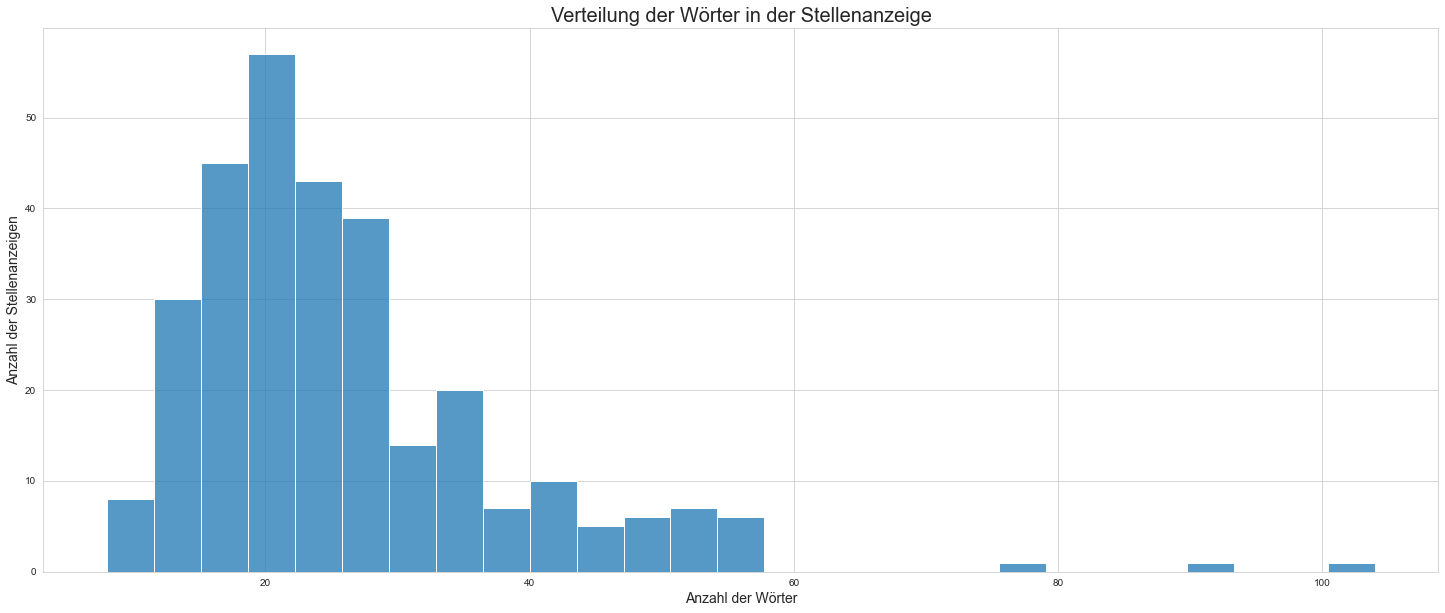

In [6]:
ad_token_num = sample_annotiert["ground_truth_TokenNum"]

plt.figure(figsize=(25,10))
sns.histplot(ad_token_num).set_title('Verteilung der Wörter in der Stellenanzeige');
plt.title('Verteilung der Wörter in der Stellenanzeige', fontsize = 20)
plt.xlabel("Anzahl der Wörter", fontsize = 14)
plt.ylabel("Anzahl der Stellenanzeigen", fontsize = 14)

In [7]:
ad_token_num.describe()

count    300.000000
mean      26.096667
std       12.395408
min        8.000000
25%       18.000000
50%       23.000000
75%       30.000000
max      104.000000
Name: ground_truth_TokenNum, dtype: float64

### 5.2. Stellenbeschreibung

Text(0, 0.5, 'Anzahl der Stellenanzeigen')

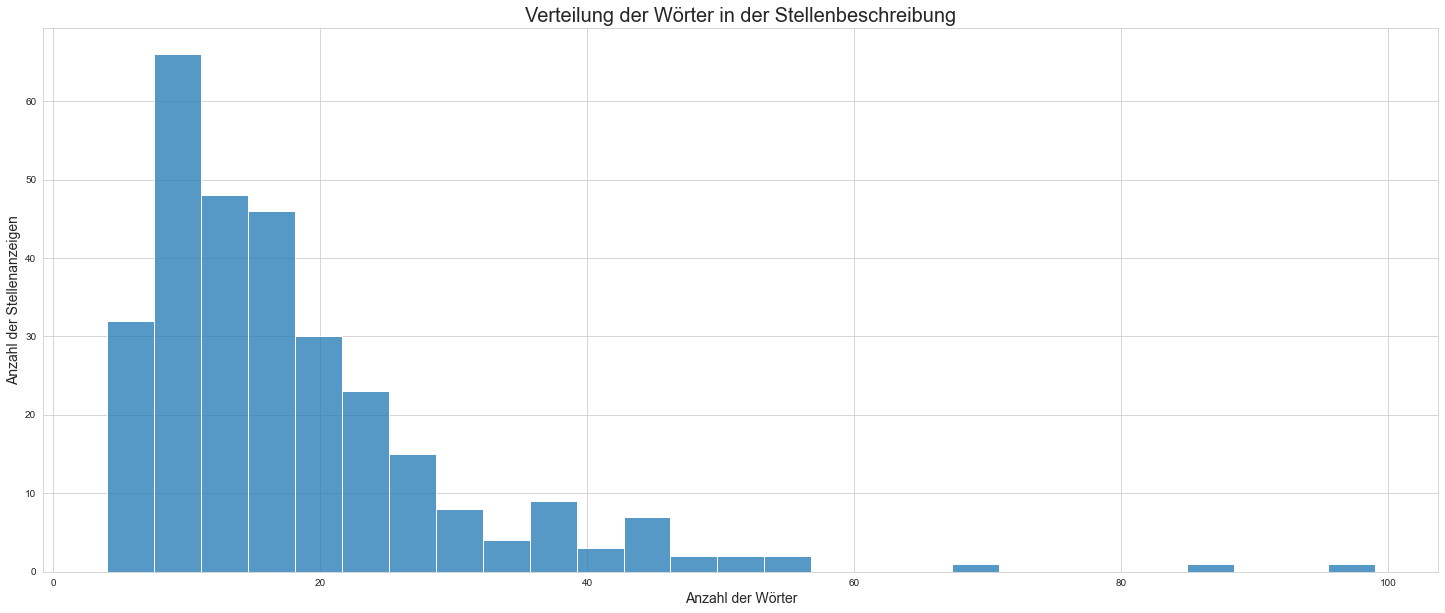

In [8]:
job_ad_token_num = sample_annotiert["stbe_TokenNum"]

plt.figure(figsize=(25, 10))
sns.histplot(job_ad_token_num).set_title('Verteilung der Wörter in der Stellenbeschreibung');
plt.title('Verteilung der Wörter in der Stellenbeschreibung', fontsize = 20)
plt.xlabel("Anzahl der Wörter", fontsize = 14)
plt.ylabel("Anzahl der Stellenanzeigen", fontsize = 14)

In [9]:
job_ad_token_num.describe()

count    300.000000
mean      18.226667
std       12.400856
min        4.000000
25%       10.000000
50%       15.000000
75%       22.000000
max       99.000000
Name: stbe_TokenNum, dtype: float64

### 5.3. Kommunikationsbeschreibung

Text(0, 0.5, 'Anzahl der Stellenanzeigen')

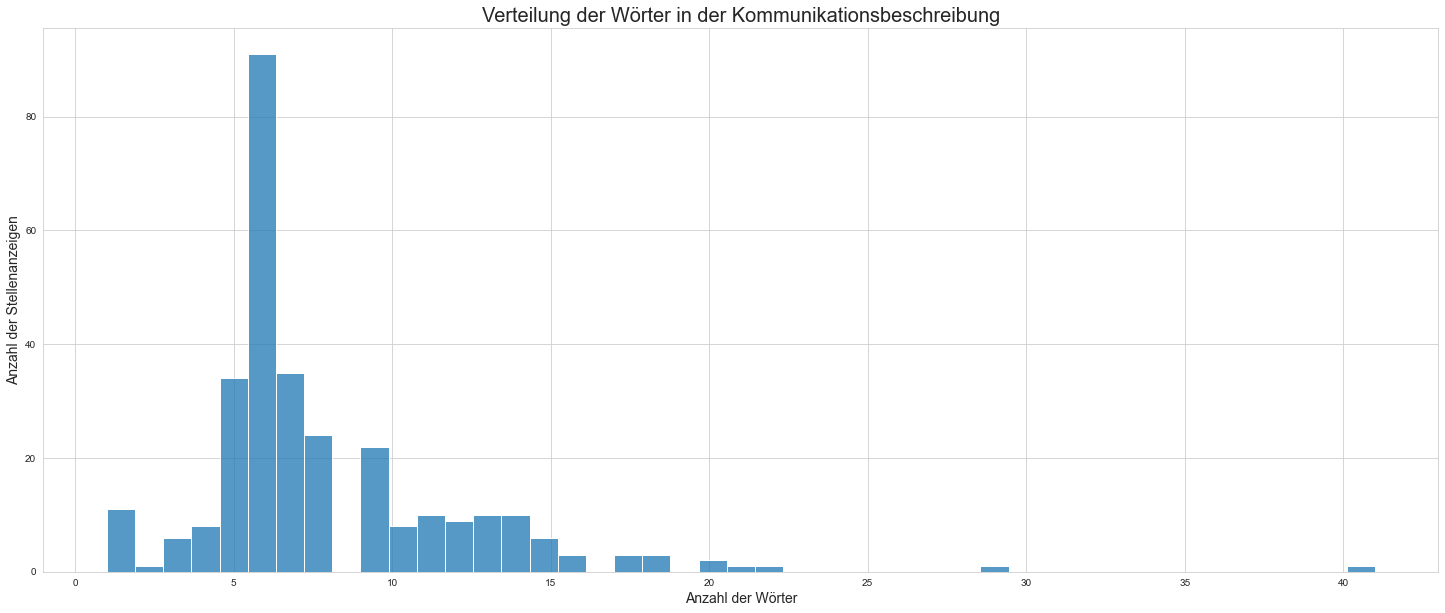

In [10]:
communication_token_num = sample_annotiert["kommbe_TokenNum"]

plt.figure(figsize=(25, 10))
sns.histplot(communication_token_num).set_title('Verteilung der Wörter in der Kommunikationsbeschreibung');
plt.title('Verteilung der Wörter in der Kommunikationsbeschreibung', fontsize = 20)
plt.xlabel("Anzahl der Wörter", fontsize = 14)
plt.ylabel("Anzahl der Stellenanzeigen", fontsize = 14)

communication_token_num.describe()

### 5.4. Extraktion der Textränder zwischen Stellenbeschreibung und Kommunikationsbeschreibung
In diesem Fall sind Punkte weiterhin Teil des Korpus. Aus diesem Grund werden die ersten 3 Tokens in einem neuen Dataframe gespeichert. 


In [12]:
df_important_tokens = sample_annotiert[['identifier','stellenbeschreibung_Token', 'kommunikationsbeschreibung_Token']]

In [13]:
#get last 3 Tokens from 
df_important_tokens['last3_stebe_tokens'] = df_important_tokens['stellenbeschreibung_Token'].str[-3:]

#detokenize
detokenize(df_important_tokens, 'last3_stebe_tokens', 'last3_stebe')


df_important_tokens.head()

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/3213460577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_tokens['last3_stebe_tokens'] = df_important_tokens['stellenbeschreibung_Token'].str[-3:]
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/2202046940.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newColumnName] = [' '.join(map(str, l)) for l in df[column_inputText]]


,identifier,stellenbeschreibung_Token,kommunikationsbeschreibung_Token,last3_stebe_tokens,last3_stebe
0,aze_19111212_12_SEARCH_2,"[Kinderloses, Ehepaar, sucht, Hausbesorgerposten]","[im, XVI, ., oder, XVII, ., Bezirk, ., Zuschri...","[Ehepaar, sucht, Hausbesorgerposten]",Ehepaar sucht Hausbesorgerposten
1,aze_19161029_17_OFFER_69,"[Bürstenmachergehilfen, Bohrer, ,, Drechsler, ...","[XIV, ., Reindorfgasse, 35, ., 4852]","[,, Bürstenfabrik, ,]",", Bürstenfabrik ,"
2,aze_19161029_17_OFFER_57,"[Maschinnäherin, welche, sich, auch, zu, ander...","[II, ., Vereinsgasse, 27, ., 349]","[Kinderwagen-, haus, ,]","Kinderwagen- haus ,"
3,aze_19171111_11_OFFER_86,"[Fabriks-Buchhalterin, wird, bei, hohem, Gehal...","[XII, ., Bez., ,, Meidlinger, Haupt-, straße, ...","[aufge-, nommen, .]",aufge- nommen .
4,aze_19180310_11_OFFER_11,"[Militärkappenmacher, oder, Kappennäherin, wer...","[VII, ., Kirchengasse, 9, A, ., 7446]","[lieferant, Swoboda, ,]","lieferant Swoboda ,"


In [15]:
# get first 3 Tokens from both columns and save it in new column

df_important_tokens['first3_kommbe_tokens'] = df_important_tokens['kommunikationsbeschreibung_Token'].str[:3]

#detokenize
detokenize(df_important_tokens, 'first3_kommbe_tokens', 'first3_kommbe')


df_important_tokens.head()

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/130005427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_tokens['first3_kommbe_tokens'] = df_important_tokens['kommunikationsbeschreibung_Token'].str[:3]
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/2202046940.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newColumnName] = [' '.join(map(str, l)) for l in df[column_inputText]]


,identifier,stellenbeschreibung_Token,kommunikationsbeschreibung_Token,last3_stebe_tokens,last3_stebe,first3_kommbe_tokens,first3_kommbe
0,aze_19111212_12_SEARCH_2,"[Kinderloses, Ehepaar, sucht, Hausbesorgerposten]","[im, XVI, ., oder, XVII, ., Bezirk, ., Zuschri...","[Ehepaar, sucht, Hausbesorgerposten]",Ehepaar sucht Hausbesorgerposten,"[im, XVI, .]",im XVI .
1,aze_19161029_17_OFFER_69,"[Bürstenmachergehilfen, Bohrer, ,, Drechsler, ...","[XIV, ., Reindorfgasse, 35, ., 4852]","[,, Bürstenfabrik, ,]",", Bürstenfabrik ,","[XIV, ., Reindorfgasse]",XIV . Reindorfgasse
2,aze_19161029_17_OFFER_57,"[Maschinnäherin, welche, sich, auch, zu, ander...","[II, ., Vereinsgasse, 27, ., 349]","[Kinderwagen-, haus, ,]","Kinderwagen- haus ,","[II, ., Vereinsgasse]",II . Vereinsgasse
3,aze_19171111_11_OFFER_86,"[Fabriks-Buchhalterin, wird, bei, hohem, Gehal...","[XII, ., Bez., ,, Meidlinger, Haupt-, straße, ...","[aufge-, nommen, .]",aufge- nommen .,"[XII, ., Bez.]",XII . Bez.
4,aze_19180310_11_OFFER_11,"[Militärkappenmacher, oder, Kappennäherin, wer...","[VII, ., Kirchengasse, 9, A, ., 7446]","[lieferant, Swoboda, ,]","lieferant Swoboda ,","[VII, ., Kirchengasse]",VII . Kirchengasse


## 6. Analyse: die letzten Wörter der Stellenbeschreibung

### 6.1. Darstellung aller letzten Wörter

In [16]:
df_important_tokens['last1_stebe_tokens'] = df_important_tokens['stellenbeschreibung_Token'].str[-1]
df_last1_stebe_tokens = get_frequency_of_words_in_column(df_important_tokens, "last1_stebe_tokens")
df_last1_stebe_tokens.head(30)

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/1843066688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_tokens['last1_stebe_tokens'] = df_important_tokens['stellenbeschreibung_Token'].str[-1]


,Wörter,Frequenz
1,",",197
3,.,79
0,Hausbesorgerposten,1
133,Holzgeschäft,1
250,Mosse,1
243,Hofphotograph,1
235,Broz,1
219,Fabrik,1
209,sekretariat,1
208,mittags,1


### 6.2. n-grams

In [17]:
df_important_tokens.head()

,identifier,stellenbeschreibung_Token,kommunikationsbeschreibung_Token,last3_stebe_tokens,last3_stebe,first3_kommbe_tokens,first3_kommbe,last1_stebe_tokens
0,aze_19111212_12_SEARCH_2,"[Kinderloses, Ehepaar, sucht, Hausbesorgerposten]","[im, XVI, ., oder, XVII, ., Bezirk, ., Zuschri...","[Ehepaar, sucht, Hausbesorgerposten]",Ehepaar sucht Hausbesorgerposten,"[im, XVI, .]",im XVI .,Hausbesorgerposten
1,aze_19161029_17_OFFER_69,"[Bürstenmachergehilfen, Bohrer, ,, Drechsler, ...","[XIV, ., Reindorfgasse, 35, ., 4852]","[,, Bürstenfabrik, ,]",", Bürstenfabrik ,","[XIV, ., Reindorfgasse]",XIV . Reindorfgasse,","
2,aze_19161029_17_OFFER_57,"[Maschinnäherin, welche, sich, auch, zu, ander...","[II, ., Vereinsgasse, 27, ., 349]","[Kinderwagen-, haus, ,]","Kinderwagen- haus ,","[II, ., Vereinsgasse]",II . Vereinsgasse,","
3,aze_19171111_11_OFFER_86,"[Fabriks-Buchhalterin, wird, bei, hohem, Gehal...","[XII, ., Bez., ,, Meidlinger, Haupt-, straße, ...","[aufge-, nommen, .]",aufge- nommen .,"[XII, ., Bez.]",XII . Bez.,.
4,aze_19180310_11_OFFER_11,"[Militärkappenmacher, oder, Kappennäherin, wer...","[VII, ., Kirchengasse, 9, A, ., 7446]","[lieferant, Swoboda, ,]","lieferant Swoboda ,","[VII, ., Kirchengasse]",VII . Kirchengasse,","


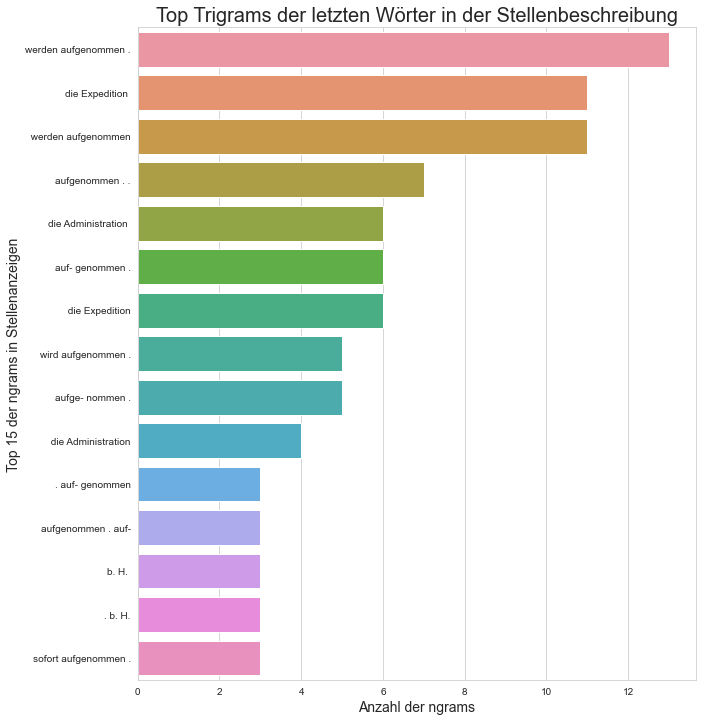

In [18]:
plot_top_ngrams_barchart(df_important_tokens["last3_stebe"], 3, "Top Trigrams der letzten Wörter in der Stellenbeschreibung")

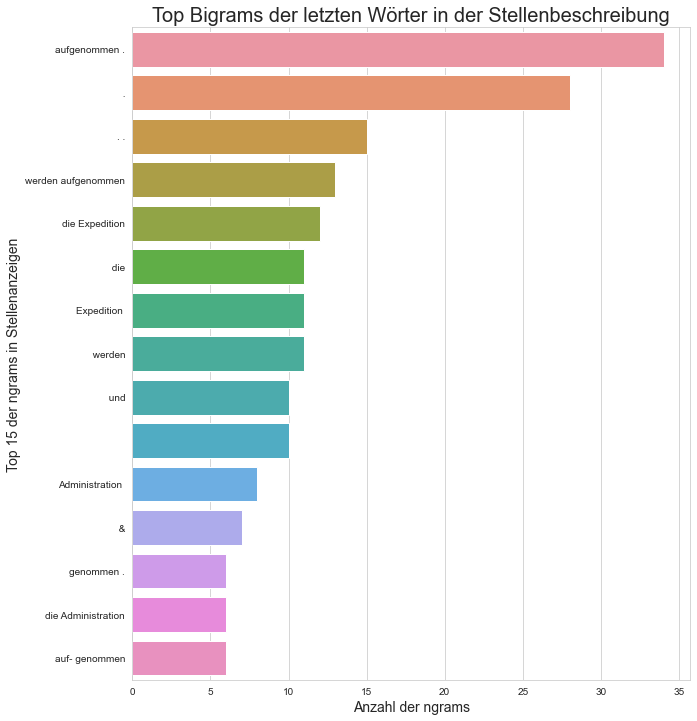

In [19]:
plot_top_ngrams_barchart(df_important_tokens["last3_stebe"], 2, "Top Bigrams der letzten Wörter in der Stellenbeschreibung")

## 7. Analyse: die ersten Wörter der Kommunikationsbeschreibung

In [20]:
df_important_tokens['first_kommbe_token'] = df_important_tokens['kommunikationsbeschreibung_Token'].str[0]
df_first_kommbe_token = get_frequency_of_words_in_column(df_important_tokens, "first_kommbe_token")
df_first_kommbe_token.head(50)

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5162/2364574654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_tokens['first_kommbe_token'] = df_important_tokens['kommunikationsbeschreibung_Token'].str[0]


,Wörter,Frequenz
4,VII,36
31,I.,26
18,V.,25
7,Wien,24
11,VI,20
9,XVI,17
2,II,16
85,XVII,10
88,X.,10
8,IX,10


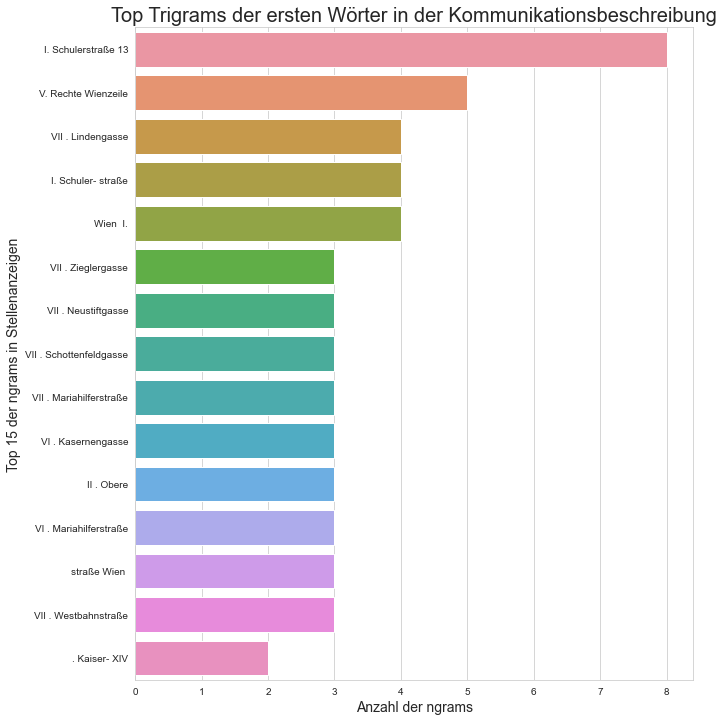

In [21]:
plot_top_ngrams_barchart(df_important_tokens["first3_kommbe"], 3, "Top Trigrams der ersten Wörter in der Kommunikationsbeschreibung")

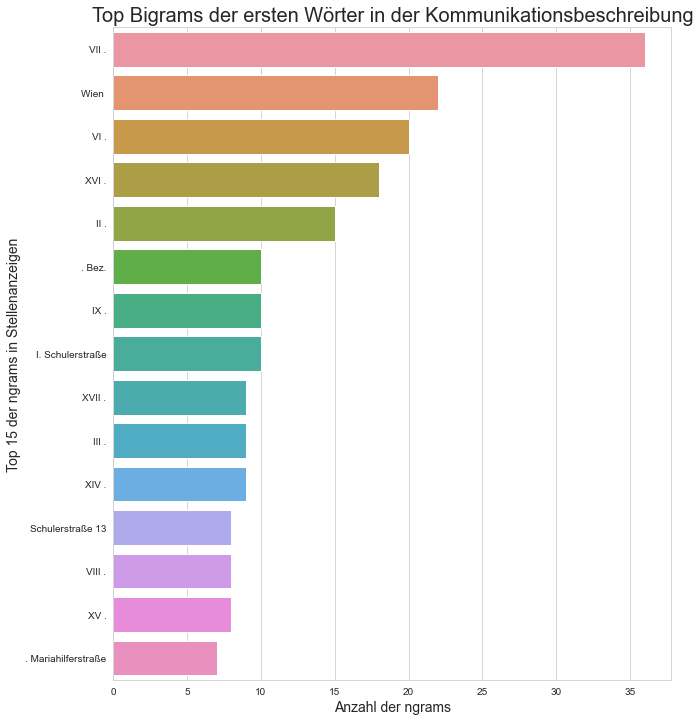

In [22]:
plot_top_ngrams_barchart(df_important_tokens["first3_kommbe"], 2, "Top Bigrams der ersten Wörter in der Kommunikationsbeschreibung")

In [24]:
sample_annotiert.to_csv('../output/4.4_5.2_annotiertesKorpus_strukturelle_analyse/master_anzeigenteilung_tokens.csv', index=False)

In [25]:
df_important_tokens.to_csv('../output/4.4_5.2_annotiertesKorpus_strukturelle_analyse/anzeigenteilung_raender_tokens.csv', index=False)